In [295]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [296]:
# FITS File 
image = 'Test/SIE/SIE_POS_lens.fits'

hdu_list = fits.open(image)
hdu_list.info()

# Extract kappa 
gamma1_sie = hdu_list[0].data[4]
gamma1_sie = np.array(gamma1_sie)

gamma2_sie = hdu_list[0].data[5]
gamma2_sie = np.array(gamma2_sie)

Filename: Test/SIE/SIE_POS_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1560, 1560, 8)   float32   


In [297]:
# FITS File 
image = 'Test/SIE+SHEAR/SIE_POS_SHEAR_lens.fits'

hdu_list = fits.open(image)
hdu_list.info()

# Extract kappa 
gamma1_sie_shear = hdu_list[0].data[4]
gamma1_sie_shear = np.array(gamma1_sie_shear)

gamma2_sie_shear = hdu_list[0].data[5]
gamma2_sie_shear = np.array(gamma2_sie_shear)

Filename: Test/SIE+SHEAR/SIE_POS_SHEAR_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1560, 1560, 8)   float32   


In [298]:
# FITS File 
image = 'Test/SIE+SHEAR+FIXED/SIE_POS_SHEAR_lens.fits'

hdu_list = fits.open(image)
hdu_list.info()

# Extract kappa 
gamma1_sie_fix = hdu_list[0].data[4]
gamma1_sie_fix = np.array(gamma1_sie_fix)

gamma2_sie_fix = hdu_list[0].data[5]
gamma2_sie_fix = np.array(gamma2_sie_fix)

Filename: Test/SIE+SHEAR+FIXED/SIE_POS_SHEAR_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1560, 1560, 8)   float32   


In [299]:
gamma_sie = np.sqrt(gamma1_sie**2 + gamma2_sie**2)
gamma_sie_shear = np.sqrt(gamma1_sie_shear**2 + gamma2_sie_shear**2)
gamma_sie_fix = np.sqrt(gamma1_sie_fix**2 + gamma2_sie_fix**2)

In [300]:
obs_point = pd.read_csv('obs_point/obs_point_(POS+FLUX).dat', delim_whitespace=True, header=None, skiprows=1)
obs_point[0] = (obs_point[0] - 20) / 0.001
obs_point[1] = (obs_point[1] - 20) / 0.001
obs_point = obs_point[[0, 1]]
obs_point

,0,1
0,777.73,302.54
1,1273.08,956.12
2,390.91,1050.57
3,819.81,1259.31


In [301]:
file_crit = 'Test/SIE/SIE_POS_crit.dat'
print(file_crit)
crit_curve_sie = pd.read_csv(file_crit, delim_whitespace=True, header=None)
crit_curve_sie = (crit_curve_sie - 20) / 0.001
crit_curve_sie

Test/SIE/SIE_POS_crit.dat


,0,1,2,3,4,5,6,7
0,788.5,434.0,789.36,761.71,788.0,434.5,789.34,762.23
1,788.5,434.0,789.36,761.71,789.5,434.0,789.36,761.69
2,789.5,434.0,789.36,761.69,790.5,434.0,789.36,761.66
3,790.5,434.0,789.36,761.66,791.5,434.0,789.36,761.63
4,791.5,434.0,789.36,761.63,792.5,434.0,789.37,761.59
...,...,...,...,...,...,...,...,...
2749,780.0,780.0,463.75,881.84,780.0,780.0,456.66,860.03
2750,780.0,780.0,456.66,860.03,780.0,780.0,451.16,837.95
2751,780.0,780.0,451.16,837.95,780.0,780.0,447.23,815.70
2752,780.0,780.0,447.23,815.70,780.0,780.0,444.89,793.38


In [302]:
file_crit = 'Test/SIE+SHEAR/SIE_POS_SHEAR_crit.dat'
print(file_crit)
crit_curve_sie_shear = pd.read_csv(file_crit, delim_whitespace=True, header=None)
crit_curve_sie_shear = (crit_curve_sie_shear - 20) / 0.001
crit_curve_sie_shear

Test/SIE+SHEAR/SIE_POS_SHEAR_crit.dat


,0,1,2,3,4,5,6,7
0,814.50,250.00,797.97,749.59,814.00,250.50,797.98,749.89
1,814.50,250.00,797.97,749.59,815.50,250.00,797.97,749.61
2,815.50,250.00,797.97,749.61,816.50,250.00,797.98,749.62
3,816.50,250.00,797.98,749.62,817.50,250.00,797.98,749.64
4,817.50,250.00,797.98,749.64,818.50,250.00,797.98,749.65
...,...,...,...,...,...,...,...,...
4011,813.13,763.88,512.74,863.15,813.13,763.88,506.30,843.33
4012,813.13,763.88,506.30,843.33,813.13,763.88,501.30,823.27
4013,813.13,763.88,501.30,823.27,813.13,763.88,497.73,803.06
4014,813.13,763.88,497.73,803.06,813.13,763.88,495.60,782.78


In [303]:
file_crit = 'Test/SIE+SHEAR+FIXED/SIE_POS_SHEAR_crit.dat'
print(file_crit)
crit_curve_sie_fix = pd.read_csv(file_crit, delim_whitespace=True, header=None)
crit_curve_sie_fix = (crit_curve_sie_fix - 20) / 0.001
crit_curve_sie_fix

Test/SIE+SHEAR+FIXED/SIE_POS_SHEAR_crit.dat


,0,1,2,3,4,5,6,7
0,814.50,250.00,809.21,730.57,814.00,250.50,809.23,731.06
1,814.50,250.00,809.21,730.57,815.50,250.00,809.22,730.60
2,815.50,250.00,809.22,730.60,816.50,250.00,809.22,730.63
3,816.50,250.00,809.22,730.63,817.50,250.00,809.22,730.65
4,817.50,250.00,809.22,730.65,818.50,250.00,809.22,730.67
...,...,...,...,...,...,...,...,...
4011,813.13,763.88,345.58,915.15,813.13,763.88,335.12,882.95
4012,813.13,763.88,335.12,882.95,813.13,763.88,326.99,850.34
4013,813.13,763.88,326.99,850.34,813.13,763.88,321.19,817.48
4014,813.13,763.88,321.19,817.48,813.13,763.88,317.73,784.52


In [304]:
pred_point = pd.read_csv('Test/SIE/SIE_POS_point.dat', delim_whitespace=True, header=None, skiprows=1)
pred_point[0] = (pred_point[0] - 20) / 0.001
pred_point[1] = (pred_point[1] - 20) / 0.001
pred_point_sie = pred_point[[0, 1]]
pred_point_sie

,0,1
0,909.3,481.0
1,469.5,645.7
2,1090.5,914.3
3,650.7,1079.0


In [305]:
pred_point = pd.read_csv('Test/SIE+SHEAR/SIE_POS_SHEAR_point.dat', delim_whitespace=True, header=None, skiprows=1)
pred_point[0] = (pred_point[0] - 20) / 0.001
pred_point[1] = (pred_point[1] - 20) / 0.001
pred_point_shear = pred_point[[0, 1]]
pred_point_shear

,0,1
0,777.7,302.5
1,1273.1,956.1
2,390.9,1050.6
3,819.8,1259.3


In [306]:
pred_point = pd.read_csv('Test/SIE+SHEAR+FIXED/SIE_POS_SHEAR_point.dat', delim_whitespace=True, header=None, skiprows=1)
pred_point[0] = (pred_point[0] - 20) / 0.001
pred_point[1] = (pred_point[1] - 20) / 0.001
pred_point_fix = pred_point[[0, 1]]
pred_point_fix

,0,1
0,777.7,302.5
1,1273.1,956.1
2,390.9,1050.6
3,819.8,1259.3


In [307]:
# Row Switching

dist_matrix = cdist(obs_point.to_numpy(), pred_point_sie.to_numpy(), 'euclidean')
obs_indices, pred_indices_optimal = linear_sum_assignment(dist_matrix)
pred_point_sie_sort = pred_point_sie.iloc[pred_indices_optimal].reset_index(drop=True)

dist_matrix = cdist(obs_point.to_numpy(), pred_point_shear.to_numpy(), 'euclidean')
obs_indices, pred_indices_optimal = linear_sum_assignment(dist_matrix)
pred_point_shear_sort = pred_point_shear.iloc[pred_indices_optimal].reset_index(drop=True)

dist_matrix = cdist(obs_point.to_numpy(), pred_point_fix.to_numpy(), 'euclidean')
obs_indices, pred_indices_optimal = linear_sum_assignment(dist_matrix)
pred_point_fix_sort = pred_point_fix.iloc[pred_indices_optimal].reset_index(drop=True)

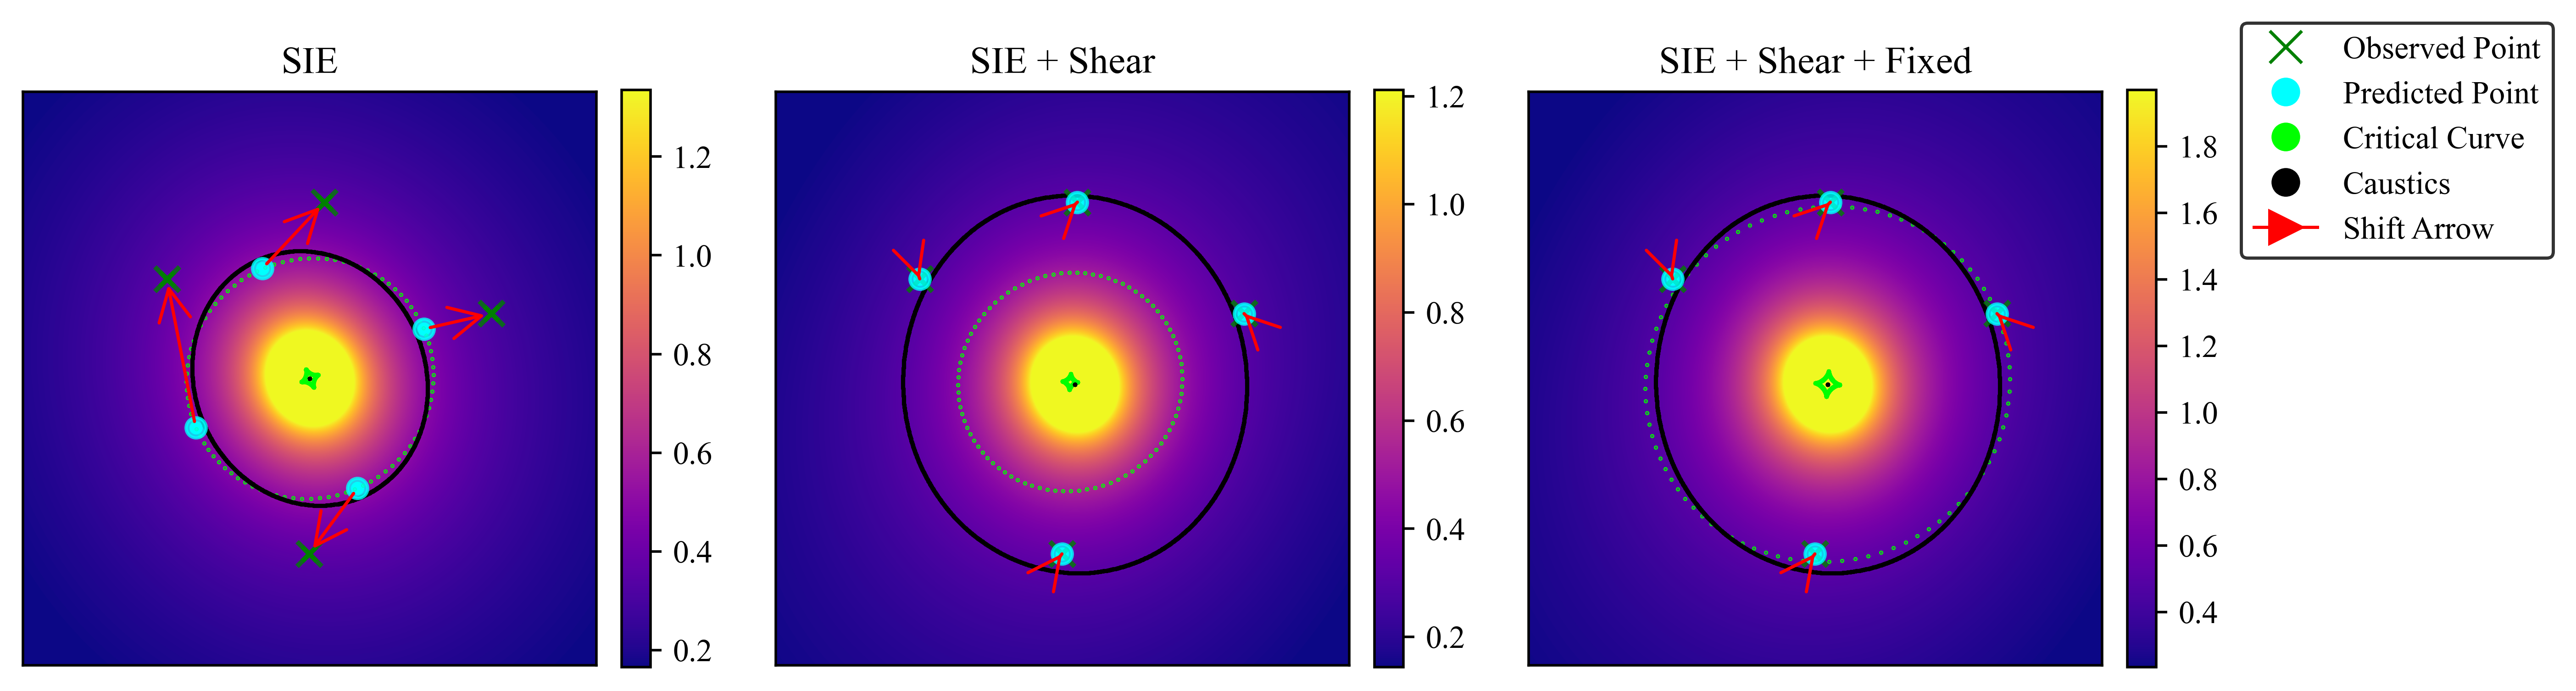

In [308]:
# Plot all 3 figures
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# SIE
vmax, vmin = np.percentile(gamma_sie, [98, 2])

ax = axs[0]
ax.imshow(gamma_sie, origin='lower', cmap='plasma', vmin=vmin, vmax=vmax)
ax.scatter(obs_point[0], obs_point[1], color='green', s=20, label='Observed Point', marker='x')
ax.scatter(pred_point_sie_sort[0], pred_point_sie_sort[1], color='cyan', s=10, label='Predicted Point')
ax.scatter(crit_curve_sie[2], crit_curve_sie[3], color='lime', label='Critical Curve', s=0.1)
ax.scatter(crit_curve_sie[4], crit_curve_sie[5], color='k', label='Caustics', s=0.1)
ax.set_title('SIE')
ax.set_xticks([])
ax.set_yticks([])
ax.colourbar = plt.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

for j in range(len(pred_point)):  # len = 4 assumed
        x_obs, y_obs = obs_point.iloc[j, 0], obs_point.iloc[j, 1]
        x_pred, y_pred = pred_point_sie_sort.iloc[j, 0], pred_point_sie_sort.iloc[j, 1]

        # Plot each point
        ax.scatter(x_obs, y_obs, color='green', s=60, alpha=0.8, marker='x')
        ax.scatter(x_pred, y_pred, color='cyan', s=40, alpha=0.8, marker='o')

        # Draw arrow
        arrow = FancyArrowPatch(
            posA=(x_pred, y_pred),
            posB=(x_obs, y_obs),
            arrowstyle='->',
            color='red',
            linewidth=1,
            mutation_scale=25,
            alpha=1
        )
        ax.add_patch(arrow)


# SIE + Shear
vmax, vmin = np.percentile(gamma_sie_shear, [98, 2])

ax = axs[1]
ax.imshow(gamma_sie_shear, origin='lower', cmap='plasma', vmin=vmin, vmax=vmax)
ax.scatter(obs_point[0], obs_point[1], color='green', s=20, label='Observed Point', marker='x')
ax.scatter(pred_point_shear_sort[0], pred_point_shear_sort[1], color='cyan', s=10, label='Predicted Point')
ax.scatter(crit_curve_sie_shear[2], crit_curve_sie_shear[3], color='lime', label='Critical Curve', s=0.1)
ax.scatter(crit_curve_sie_shear[4], crit_curve_sie_shear[5], color='k', label='Caustics', s=0.1)
ax.set_title('SIE + Shear')
ax.set_xticks([])
ax.set_yticks([])
ax.colourbar = plt.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

for j in range(len(pred_point)):  # len = 4 assumed
        x_obs, y_obs = obs_point.iloc[j, 0], obs_point.iloc[j, 1]
        x_pred, y_pred = pred_point_shear_sort.iloc[j, 0], pred_point_shear_sort.iloc[j, 1]

        # Plot each point
        ax.scatter(x_obs, y_obs, color='green', s=60, alpha=0.8, marker='x')
        ax.scatter(x_pred, y_pred, color='cyan', s=40, alpha=0.8, marker='o')

        # Draw arrow
        arrow = FancyArrowPatch(
            posA=(x_pred, y_pred),
            posB=(x_obs, y_obs),
            arrowstyle='->',
            color='red',
            linewidth=1,
            mutation_scale=25,
            alpha=1
        )
        ax.add_patch(arrow)

# SIE + Shear + Fixed
vmax, vmin = np.percentile(gamma_sie_fix, [98, 2])

ax = axs[2]
ax.imshow(gamma_sie_fix, origin='lower', cmap='plasma', vmin=vmin, vmax=vmax)
ax.scatter(obs_point[0], obs_point[1], color='green', s=20, label='Observed Point', marker='x')
ax.scatter(pred_point_fix_sort[0], pred_point_fix_sort[1], color='cyan', s=10, label='Predicted Point')
ax.scatter(crit_curve_sie_fix[2], crit_curve_sie_fix[3], color='lime', label='Critical Curve', s=0.1)
ax.scatter(crit_curve_sie_fix[4], crit_curve_sie_fix[5], color='k', label='Caustics', s=0.1)
ax.set_title('SIE + Shear + Fixed')
ax.set_xticks([])
ax.set_yticks([])
ax.colourbar = plt.colorbar(ax.images[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

for j in range(len(pred_point)):  # len = 4 assumed
        x_obs, y_obs = obs_point.iloc[j, 0], obs_point.iloc[j, 1]
        x_pred, y_pred = pred_point_fix_sort.iloc[j, 0], pred_point_fix_sort.iloc[j, 1]

        # Plot each point
        ax.scatter(x_obs, y_obs, color='green', s=60, alpha=0.8, marker='x')
        ax.scatter(x_pred, y_pred, color='cyan', s=40, alpha=0.8, marker='o')

        # Draw arrow
        arrow = FancyArrowPatch(
            posA=(x_pred, y_pred),
            posB=(x_obs, y_obs),
            arrowstyle='->',
            color='red',
            linewidth=1,
            mutation_scale=25,
            alpha=1
        )
        ax.add_patch(arrow)

legend_elements = [
    Line2D([0], [0], marker='x', color='w', markerfacecolor='green', markeredgecolor='green', markersize=5, label='Observed Point'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=5, label='Predicted Point'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lime', markersize=5, label='Critical Curve'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=5, label='Caustics'),
    Line2D([0], [0], color='red', lw=1, label='Shift Arrow', marker='>', markersize=5, linestyle='-')
]

fig.legend(handles=legend_elements, loc='upper right', fontsize = 'medium', bbox_to_anchor=(1.05, 0.9), markerscale=2, frameon=True, facecolor='white', framealpha=0.8, edgecolor='black')
plt.show()